## 주차수요 예측 AI 경진대회

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#폰트 설정          
from matplotlib import rc 
%matplotlib inline          
rc('font', family='AppleGothic' )
plt.rcParams['axes.unicode_minus'] = False  

In [3]:
#데이터 불러오기
dir='/Users/yuchanghee/Desktop/DACON/parking_data/'
train= pd.read_csv(dir+'train.csv')
test= pd.read_csv(dir+'test.csv')
age_gender_info=pd.read_csv(dir+'age_gender_info.csv')
sample_submission=pd.read_csv(dir+'sample_submission.csv')

In [115]:
print('train.shape: ', train.shape)
print('test.shape: ', test.shape)
print('age_gender_info.shape: ', age_gender_info.shape) 

train.shape:  (2952, 15)
test.shape:  (1022, 14)
age_gender_info.shape:  (16, 23)


In [5]:
train.head() 

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
0  C2483   900    아파트  경상북도  국민임대  39.72       134  38.0    A  15667000   
1  C2483   900    아파트  경상북도  국민임대  39.72        15  38.0    A  15667000   
2  C2483   900    아파트  경상북도  국민임대  51.93       385  38.0    A  27304000   
3  C2483   900    아파트  경상북도  국민임대  51.93        15  38.0    A  27304000   
4  C2483   900    아파트  경상북도  국민임대  51.93        41  38.0    A  27304000   

      임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수   등록차량수  
0  103680                           0.0                 3.0   1425.0  1015.0  
1  103680                           0.0                 3.0   1425.0  1015.0  
2  184330                           0.0                 3.0   1425.0  1015.0  
3  184330                           0.0                 3.0   1425.0  1015.0  
4  184330                           0.0                 3.0   1425.0  1015.0

In [6]:
test.head()

단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
0  C1072   754    아파트  경기도  국민임대  39.79       116  14.0    H  22830000   
1  C1072   754    아파트  경기도  국민임대  46.81        30  14.0    A  36048000   
2  C1072   754    아파트  경기도  국민임대  46.90       112  14.0    H  36048000   
3  C1072   754    아파트  경기도  국민임대  46.90       120  14.0    H  36048000   
4  C1072   754    아파트  경기도  국민임대  51.46        60  14.0    H  43497000   

      임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
0  189840                           0.0                 2.0    683.0  
1  249930                           0.0                 2.0    683.0  
2  249930                           0.0                 2.0    683.0  
3  249930                           0.0                 2.0    683.0  
4  296780                           0.0                 2.0    683.0

In [116]:
age_gender_info.head()

지역  10대미만(여자)  10대미만(남자)   10대(여자)   10대(남자)   20대(여자)   20대(남자)  \
0   경상북도   0.030158   0.033195  0.056346  0.061360  0.060096  0.067859   
1   경상남도   0.027400   0.026902  0.053257  0.055568  0.064920  0.070618   
2  대전광역시   0.028197   0.029092  0.040490  0.042793  0.060834  0.064247   
3    경기도   0.038030   0.039507  0.052546  0.053990  0.058484  0.059894   
4   전라북도   0.028089   0.029065  0.059685  0.060080  0.066262  0.070322   

    30대(여자)   30대(남자)   40대(여자)  ...   60대(여자)   60대(남자)   70대(여자)   70대(남자)  \
0  0.053433  0.049572  0.083660  ...  0.082684  0.063889  0.047717  0.030172   
1  0.056414  0.057550  0.077092  ...  0.087201  0.069562  0.048357  0.033277   
2  0.068654  0.066848  0.074667  ...  0.088468  0.070261  0.051010  0.037143   
3  0.072331  0.068704  0.083208  ...  0.074237  0.058419  0.042422  0.032725   
4  0.052027  0.046596  0.077005  ...  0.076636  0.068042  0.051025  0.035748   

    80대(여자)   80대(남자)   90대(여자)   90대(남자)  100대(여자)  100대(남자)  
0  0.029361  0.011211  0.005578  0.001553  0.000234  0.000014  
1  0.027361  0.011295  0.004910  0.001086  0.000179  0.000010  
2  0.032455  0.013751  0.006494  0.001740  0.000298  0.000066  
3  0.025136  0.012354  0.005390  0.001707  0.000290  0.000067  
4  0.035049  0.012641  0.007223  0.001898  0.000158  0.000013  

[5 rows x 23 columns]

In [121]:
age_gender_info.sum(axis=1)  

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
dtype: float64

#### 변수 설명
- 자격 유형: 입주민의 입주자격의 유형(비식별화)
- 공가수: 비어있는 집
- 전용면적별 세대수: 임대 아파트 대상만 집계
- 전체 세대수 : '분양'아파트가 포함된 수치
- 전용 면적 : 단순 면적이 아닌 별도의 비공개 기준

In [10]:
#결측치 확인
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [11]:
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

#### 추측 1: 임대보증금 - 임대료 상관관계 높아보임

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [18]:
train.describe()  

총세대수         전용면적     전용면적별세대수          공가수  \
count  2952.000000  2952.000000  2952.000000  2952.000000   
mean    886.661247    44.757215   102.747967    12.921070   
std     513.540168    31.874280   132.640159    10.778831   
min      26.000000    12.620000     1.000000     0.000000   
25%     513.500000    32.100000    14.000000     4.000000   
50%     779.000000    39.930000    60.000000    11.000000   
75%    1106.000000    51.562500   144.000000    20.000000   
max    2568.000000   583.400000  1865.000000    55.000000   

       도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수      단지내주차면수  \
count                   2741.000000         2948.000000  2952.000000   
mean                       0.176578            3.695726   601.668360   
std                        0.427408            2.644665   396.407072   
min                        0.000000            0.000000    13.000000   
25%                        0.000000            2.000000   279.250000   
50%                        0.000000            3.000000   517.000000   
75%                        0.000000            4.000000   823.000000   
max                        3.000000           20.000000  1798.000000   

             등록차량수  
count  2952.000000  
mean    559.768293  
std     433.375027  
min      13.000000  
25%     220.000000  
50%     487.000000  
75%     770.000000  
max    2550.000000

### EDA 
- 단변수 분석
- 다변수 분석 (등록차량수)
- 상관분석 

1. 단변수 분석

In [72]:
def float_plot(columns, df): #연속형 단변수 
    for col in columns:
        sns.distplot(df[col])  
        plt.show()
 
def cate_plot(columns,df): #범주형 단변수
    for col in columns: 
        chart=sns.countplot(x=col,data=df)   
        chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
        plt.show()  
    return 

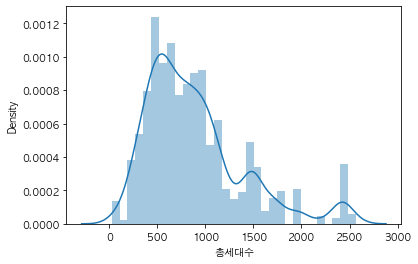

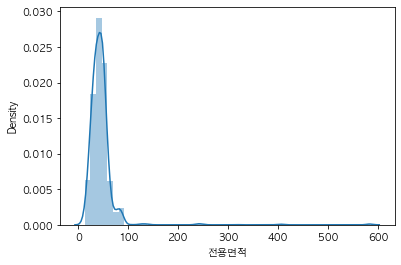

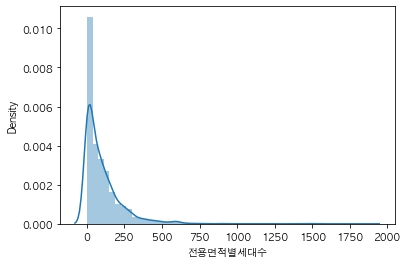

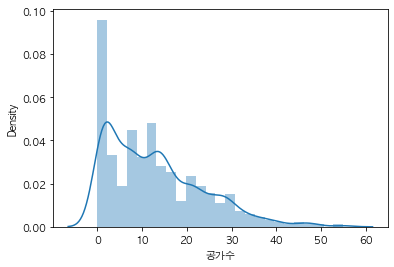

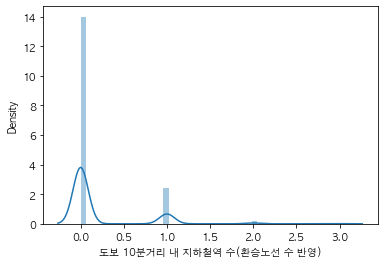

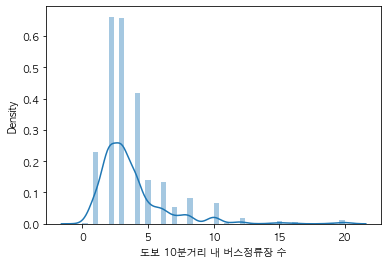

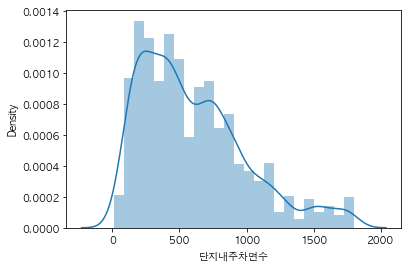

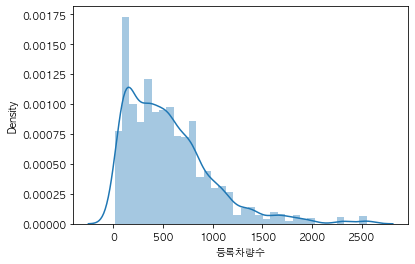

In [50]:
float_plot(train.dtypes[train.dtypes!='object'].index.tolist(), train) 

1. 종속변수 -> 로그화 필요

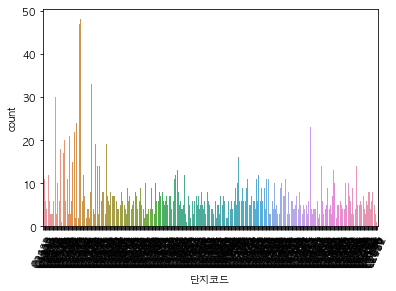

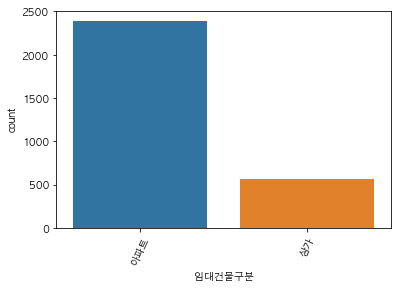

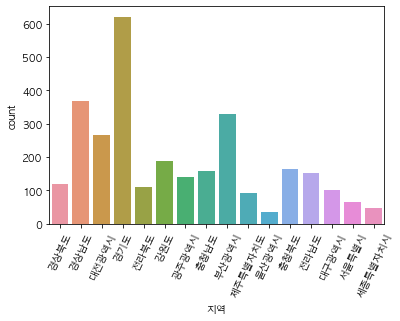

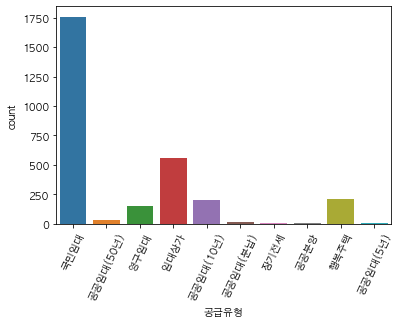

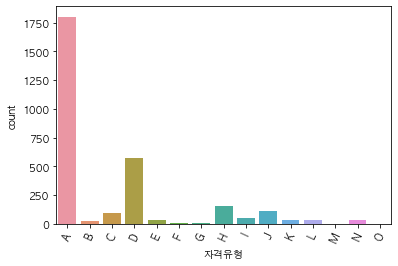

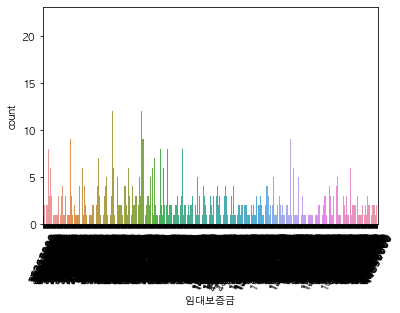

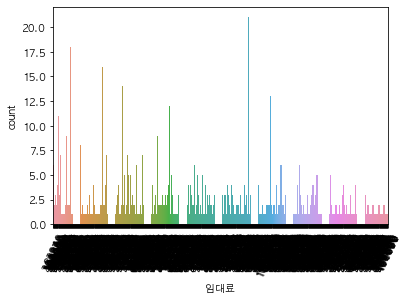

In [57]:
cate_plot(train.dtypes[train.dtypes=='object'].index.tolist(), train)  

In [59]:
train[['임대료','임대보증금']].value_counts()

임대료     임대보증금   
79980   5787000     18
-       -           12
257660  34810000    12
100920  14418000    12
94990   6873000     12
                    ..
308130  43617000     1
        47698000     1
311830  28633000     1
317500  53018000     1
202330  21497000     1
Length: 1154, dtype: int64

In [62]:
#임대료, 임대보증금 null 처리
train.loc[train['임대료']=='-', '임대료'] = np.nan  
train.loc[train['임대보증금']=='-', '임대보증금'] = np.nan  

In [63]:
train[['임대보증금','임대료']]=train[['임대보증금','임대료']].astype(np.float64)  

195718.08213378492


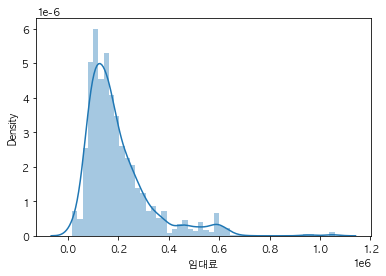

In [68]:
sns.distplot(train['임대료']) 
print(train['임대료'].mean()) 

#### 임대료 대부분이 40만원 이하, 평균 대략 20만원 

26864318.09363138


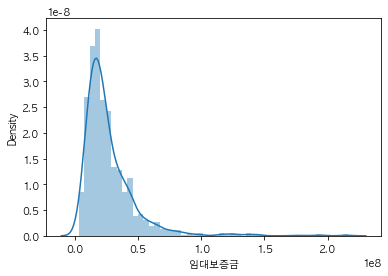

In [69]:
sns.distplot(train['임대보증금']) 
print(train['임대보증금'].mean())

#### 임대보증금 대부분 5천만원 이하, 평균 2천 6백만원

2. 다변수 분석

In [74]:
train.dtypes[train.dtypes=='object']

단지코드      object
임대건물구분    object
지역        object
공급유형      object
자격유형      object
dtype: object

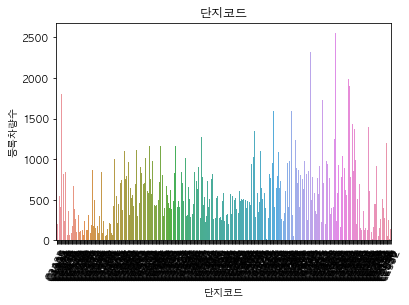

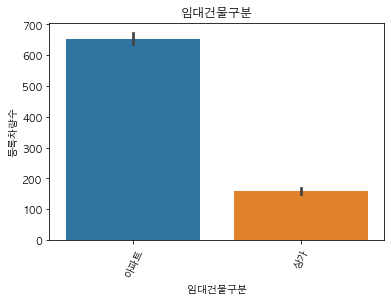

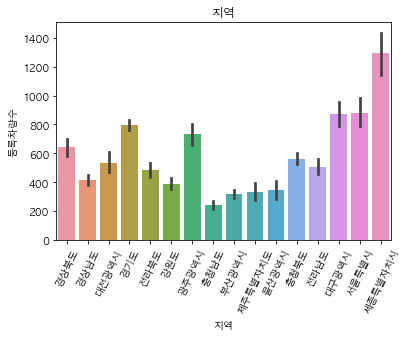

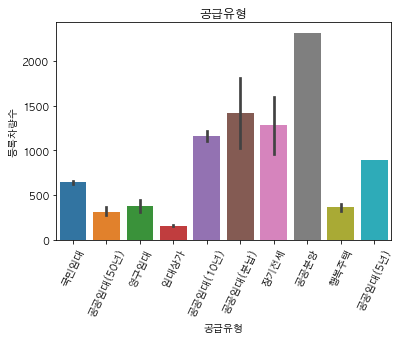

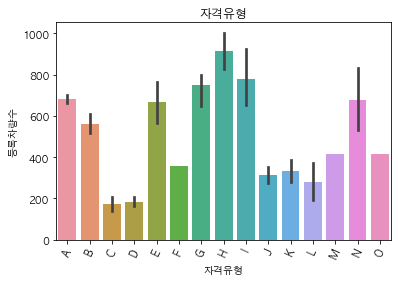

In [124]:
for column in train.dtypes[train.dtypes=='object'].index.tolist():
    chart=sns.barplot(x=train[column],y='등록차량수', data=train) 
    plt.title(column)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
    plt.show() 

1. 아파트가 상가보다 더 등록 차량수가 많다. 
2. 세종특별자치시가 다른 지역보다 월등하게 등록 차량수가 많다. 그 다음으로는 수도권  
3. 공공분양의 경우 등록 차량수가 많다.  

In [80]:
train.corr()  

총세대수      전용면적  전용면적별세대수       공가수  \
총세대수                          1.000000  0.042271  0.098205  0.068192   
전용면적                          0.042271  1.000000 -0.035479 -0.089201   
전용면적별세대수                      0.098205 -0.035479  1.000000  0.166472   
공가수                           0.068192 -0.089201  0.166472  1.000000   
임대보증금                         0.075493  0.490950 -0.099252  0.030728   
임대료                           0.099606  0.740591 -0.057759 -0.194322   
도보 10분거리 내 지하철역 수(환승노선 수 반영)  0.213843 -0.013111 -0.056680 -0.093334   
도보 10분거리 내 버스정류장 수           -0.001446 -0.007866  0.047112  0.043285   
단지내주차면수                       0.501488  0.071260  0.281989  0.289819   
등록차량수                         0.316703  0.115453  0.247085  0.118121   

                                 임대보증금       임대료  \
총세대수                          0.075493  0.099606   
전용면적                          0.490950  0.740591   
전용면적별세대수                     -0.099252 -0.057759   
공가수                           0.030728 -0.194322   
임대보증금                         1.000000  0.557144   
임대료                           0.557144  1.000000   
도보 10분거리 내 지하철역 수(환승노선 수 반영)  0.027113  0.071571   
도보 10분거리 내 버스정류장 수            0.110757  0.044654   
단지내주차면수                       0.270697  0.279785   
등록차량수                         0.311469  0.416536   

                              도보 10분거리 내 지하철역 수(환승노선 수 반영)  \
총세대수                                              0.213843   
전용면적                                             -0.013111   
전용면적별세대수                                         -0.056680   
공가수                                              -0.093334   
임대보증금                                             0.027113   
임대료                                               0.071571   
도보 10분거리 내 지하철역 수(환승노선 수 반영)                      1.000000   
도보 10분거리 내 버스정류장 수                                0.098380   
단지내주차면수                                          -0.055544   
등록차량수                                            -0.108592   

                              도보 10분거리 내 버스정류장 수   단지내주차면수     등록차량수  
총세대수                                   -0.001446  0.501488  0.316703  
전용면적                                   -0.007866  0.071260  0.115453  
전용면적별세대수                                0.047112  0.281989  0.247085  
공가수                                     0.043285  0.289819  0.118121  
임대보증금                                   0.110757  0.270697  0.311469  
임대료                                     0.044654  0.279785  0.416536  
도보 10분거리 내 지하철역 수(환승노선 수 반영)            0.098380 -0.055544 -0.108592  
도보 10분거리 내 버스정류장 수                      1.000000  0.070696  0.103752  
단지내주차면수                                 0.070696  1.000000  0.859216  
등록차량수                                   0.103752  0.859216  1.000000

3. 상관분석

<AxesSubplot:>

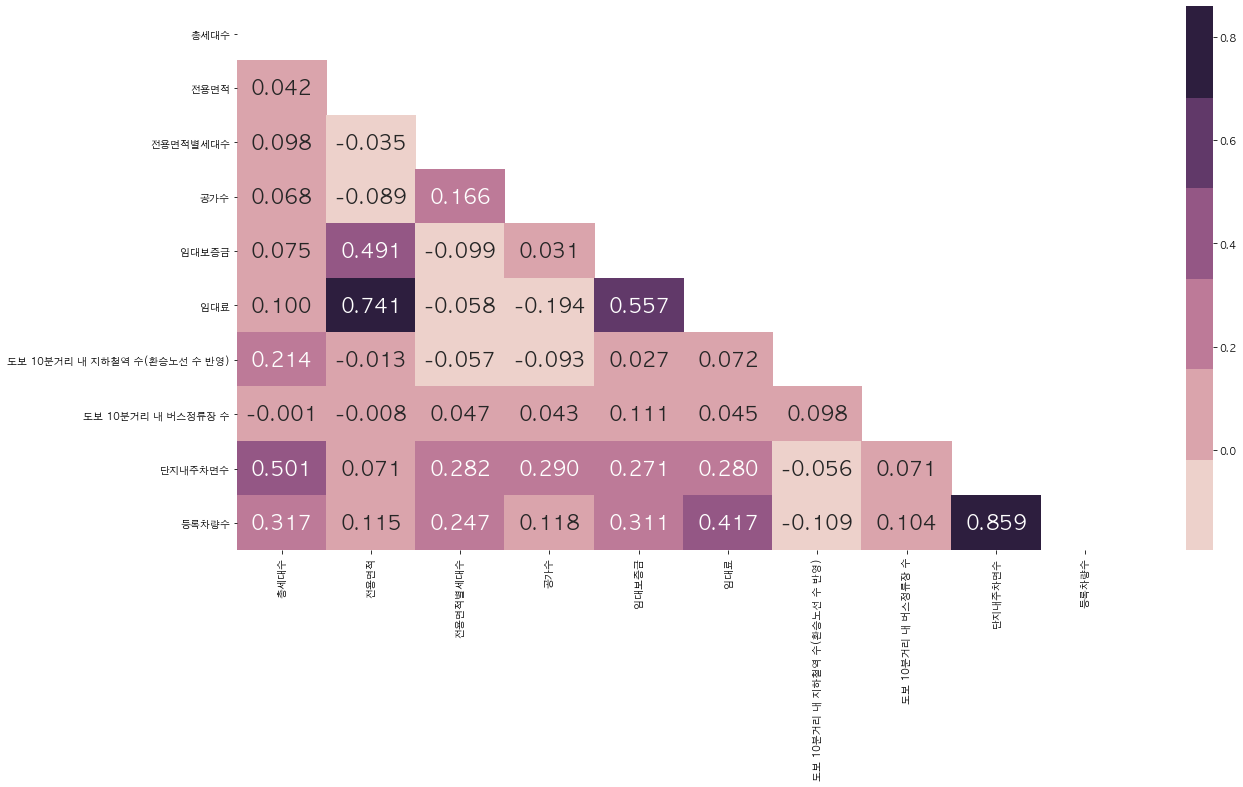

In [83]:
mask = np.zeros_like(train.corr() ,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,fmt=".3f",annot_kws = {"size":20},cmap=sns.cubehelix_palette(),mask=mask) 

In [102]:
#전용면적별세대수 sum == 총 세대수 
train.groupby('단지코드')['전용면적별세대수'].sum().reset_index() 

단지코드  전용면적별세대수
0    C1000       566
1    C1004       521
2    C1005      1144
3    C1013      1308
4    C1014       996
..     ...       ...
418  C2663       772
419  C2666      1084
420  C2670       648
421  C2680       758
422  C2692       499

[423 rows x 2 columns]

In [110]:
train_total=train.groupby('단지코드')['전용면적별세대수'].sum().reset_index() 
train_total['총세대수']=train.groupby('단지코드')['총세대수'].min().values
for i in range(len(train_total)):   
    if train_total['총세대수'].loc[i] != train_total['전용면적별세대수'].loc[i]:
        print(i, end=', ')  

8, 22, 39, 49, 53, 69, 80, 96, 109, 123, 152, 163, 165, 181, 189, 202, 208, 211, 224, 236, 273, 275, 279, 283, 293, 297, 308, 313, 327, 340, 346, 351, 354, 368, 373, 383, 384, 389, 407, 412, 

In [129]:
train_total.loc[351]   

단지코드        C2453
전용면적별세대수      658
총세대수          659
Name: 351, dtype: object

In [126]:
train[train['단지코드']=='C1068'] 

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형       임대보증금  \
347  C1068   806    아파트  충청남도  국민임대  36.65       200  11.0    A  11234000.0   
348  C1068   806    아파트  충청남도  국민임대  36.98       130  11.0    A  11234000.0   
349  C1068   806    아파트  충청남도  국민임대  41.55       252  11.0    A  14981000.0   
350  C1068   806    아파트  충청남도  국민임대  46.86        44  11.0    A  18726000.0   
351  C1068   806    아파트  충청남도  국민임대  46.98        88  11.0    A  18726000.0   
352  C1068   806    아파트  충청남도  국민임대  51.93        91  11.0    A  24343000.0   

          임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  \
347  106090.0                           NaN                 2.0    804.0   
348  106090.0                           NaN                 2.0    804.0   
349  124830.0                           NaN                 2.0    804.0   
350  149810.0                           NaN                 2.0    804.0   
351  149810.0                           NaN                 2.0    804.0   
352  168520.0                           NaN                 2.0    804.0   

     등록차량수  
347  510.0  
348  510.0  
349  510.0  
350  510.0  
351  510.0  
352  510.0

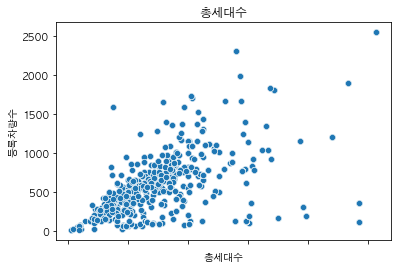

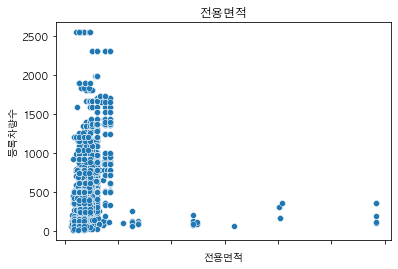

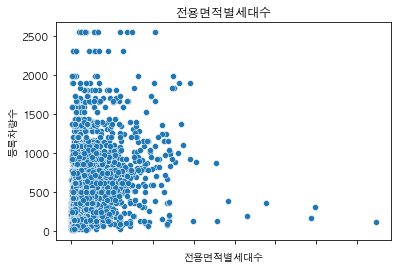

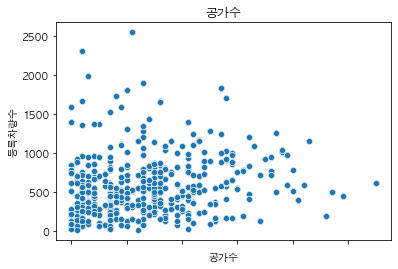

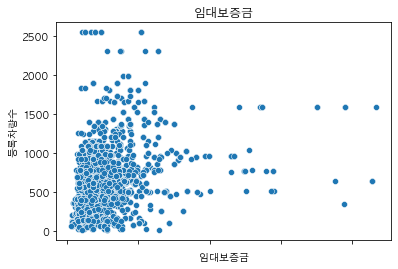

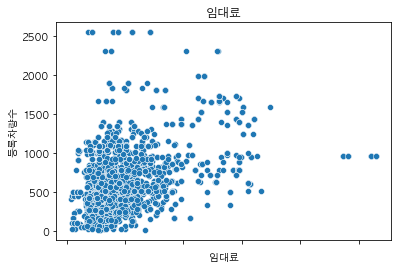

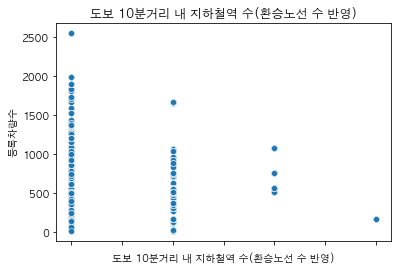

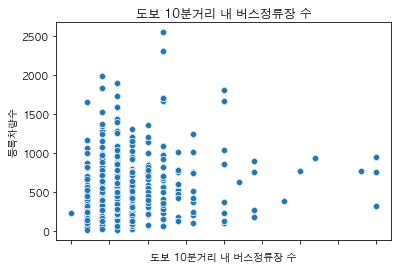

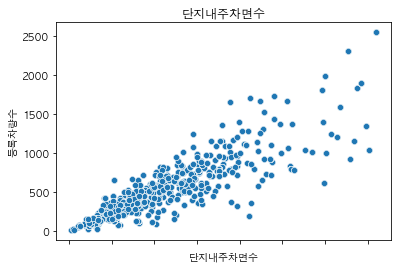

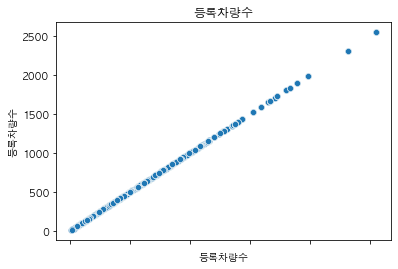

In [160]:
for column in train.dtypes[train.dtypes!='object'].index.tolist():
    chart=sns.scatterplot(x=train[column],y='등록차량수', data=train)
    plt.title(column) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=65)
    plt.show()  

1. 총 세대수가 많을수록 당연히 등록차량수도 많다. 
2. 전용면적과 등록차량수는 상관관계가 적다. 
3. 단지내 주차 면수가 클수록 등록차량수가 많다. 


## preprocessing

- Feature Engineering 
1. 실 세대수: 전용면적별 세대수 - 공가수 
2. 분양 세대수 : 총 세대수 - 전용면적별 세대수  

In [157]:
# null 대체
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [149]:
train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].value_counts()

C1874    30
C1875    22
C1616    22
C2258    20
C1004    19
C1704    17
C1983    15
C1350    13
C2583    11
C2644     7
C1068     6
C2100     6
C1649     4
C1312     4
C1005     3
C1175     3
C2156     3
C1424     3
C2216     2
C2520     1
Name: 단지코드, dtype: int64

In [155]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].describe()

count    2741.000000
mean        0.176578
std         0.427408
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64

In [150]:
train[train['단지코드']=='C1874']

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형      임대보증금  \
98   C1874   619    아파트  충청남도  영구임대  26.37       294  2.0    C  3141000.0   
99   C1874   619    아파트  충청남도  영구임대  26.37       149  2.0    C  3141000.0   
100  C1874   619    아파트  충청남도  영구임대  31.32       149  2.0    C  3731000.0   
101  C1874   619     상가  충청남도  임대상가  12.62         1  2.0    D        NaN   
102  C1874   619     상가  충청남도  임대상가  17.40         1  2.0    D        NaN   
103  C1874   619     상가  충청남도  임대상가  17.40         1  2.0    D        NaN   
104  C1874   619     상가  충청남도  임대상가  22.89         1  2.0    D        NaN   
105  C1874   619     상가  충청남도  임대상가  23.13         1  2.0    D        NaN   
106  C1874   619     상가  충청남도  임대상가  23.13         1  2.0    D        NaN   
107  C1874   619     상가  충청남도  임대상가  23.25         1  2.0    D        NaN   
108  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
109  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
110  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
111  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
112  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
113  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
114  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
115  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
116  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
117  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
118  C1874   619     상가  충청남도  임대상가  27.75         1  2.0    D        NaN   
119  C1874   619     상가  충청남도  임대상가  28.19         1  2.0    D        NaN   
120  C1874   619     상가  충청남도  임대상가  34.80         1  2.0    D        NaN   
121  C1874   619     상가  충청남도  임대상가  34.80         1  2.0    D        NaN   
122  C1874   619     상가  충청남도  임대상가  42.35         1  2.0    D        NaN   
123  C1874   619     상가  충청남도  임대상가  42.40         1  2.0    D        NaN   
124  C1874   619     상가  충청남도  임대상가  49.37         1  2.0    D        NaN   
125  C1874   619     상가  충청남도  임대상가  55.17         1  2.0    D        NaN   
126  C1874   619     상가  충청남도  임대상가  55.17         1  2.0    D        NaN   
127  C1874   619     상가  충청남도  임대상가  55.50         1  2.0    D        NaN   

         임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  등록차량수  
98   69900.0                           NaN                 2.0     97.0   62.0  
99   69900.0                           NaN                 2.0     97.0   62.0  
100  83020.0                           NaN                 2.0     97.0   62.0  
101      NaN                           NaN                 2.0     97.0   62.0  
102      NaN                           NaN                 2.0     97.0   62.0  
103      NaN                           NaN                 2.0     97.0   62.0  
104      NaN                           NaN                 2.0     97.0   62.0  
105      NaN                           NaN                 2.0     97.0   62.0  
106      NaN                           NaN                 2.0     97.0   62.0  
107      NaN                           NaN                 2.0     97.0   62.0  
108      NaN                           NaN                 2.0     97.0   62.0  
109      NaN                           NaN                 2.0     97.0   62.0  
110      NaN                           NaN                 2.0     97.0   62.0  
111      NaN                           NaN                 2.0     97.0   62.0  
112      NaN                           NaN                 2.0     97.0   62.0  
113      NaN                           NaN                 2.0     97.0   62.0  
114      NaN                           NaN                 2.0     97.0   62.0  
115      NaN                           NaN                 2.0     97.0   62.0  
116      NaN                           NaN                 2.0     97.0   62.0 